# **Описание кейса: ИИ оптимизирует производство атомного топлива**

Производственные процессы на больших предприятиях - это не только позитивность в отчетах на заседаниях министерства тяжелой промышленности, но и прежде всего работа людьми, с людьми и для людей. Однако это означает довольно высокий процент ошибок вследствие человеческого фактора, а на производстве это может повлечь за собой не только брак продукции, но и человеческие жертвы. Командам предлагается с помощью ИИ оптимизировать алгоритм загрузки и работы прессов и печей в производстве топлива из редких цветных металлов.

https://lodmedia.hb.bizmrg.com/cases/1058016/%D0%A0%D0%BE%D1%81%D0%B0%D1%82%D0%BE%D0%BC%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9.pdf

**Задача:**

Решение задачи представляет собой готовый алгоритм, выдающий результат в виде графика загрузки.

**Ограничения на технологии:**

Программы и библиотеки с открытым исходным кодом (open source) и общедоступные публичные данные. Используемый стек технологий должен обеспечить автономность решения (возможность использования без сети «Интернет») и поддерживать платформы Windows, Linux.

**🛑 Запрещается:**

-	Автоматизированные средства оценивания точности работы предложенных участниками алгоритмов не применяются.
Итоговая оценка определяется как итоговый балл жюри.


**⬆️ Куда сабмитить решения:**

На платформу хакатона в раздел ХАКАТОН:  https://lk.hacks-ai.ru/969092/hack


# **Ход решения команды и чек-поинты**

**Гуугл-докс**, в котором записываются эксперименты
<_____>

- **NAME** - понятное короткое название
- **ROC-AUC TEST** - желательно на их "тестовой" выборке, которая часть трейна, последние 2 недели, так проще сравнивать
- **FOR CHECKPOINT** - сюда вписывать соответсвующий чекпойнт, если на него отправляем файл
- **LINK** - ссылка на этот файл
- **COMMENT** - любые пояснения
- **TRACK** - номер трека, с вероятностью - 2й трек, без - 1й

**Опциональные поля:**
- **config** - вспомогательное поле, куда для удобства можно сохранять конфиги параметро из своего обучения
- **ROC-AUC TRAIN** - для понимания оверфита

# **МОИ НОУТБУКИ:**
1. на Kaggle
2. на Google Colab


# Установка библиотек:

In [ ]:
!pip install gdown

# Импорт библиотек:

In [ ]:
# Импортируем модуль json
import json
from pandas.io.json import json_normalize

# Импортируем функцию pprint()
from pprint import pprint

In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook',font_scale=1.25)
sns.set_theme()
import plotly.express as px

import zipfile
import io

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, ARDRegression, BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
print(f"Numpy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")

Numpy version: 1.23.5
Pandas version: 1.5.3
Seaborn version: 0.12.2


# ОТКРЫВАЕМ ДАТАСЕТ организаторов:

In [ ]:
# Функция для загрузки данных из json-файла:
def json_load():

  return

In [ ]:
# Открываем файл 'day-0.json' и связываем его с объектом "f"
with open('day-0.json') as f:
    # Загружаем содержимое открытого файла в переменную day_0
    day_0 = json.load(f)

df_0 = json_normalize(day_0)
df_0.head()

# Создаём объект DataFrame из списка day_0.json
df_0_ovens = pd.DataFrame(day_0['ovens'])
df_0_series = pd.DataFrame(day_0['series'])

In [ ]:
# Открываем файл 'day-1.json' и связываем его с объектом "f"
with open('day-1.json') as f:
    # Загружаем содержимое открытого файла в переменную day_1
    day_1 = json.load(f)

df_1 = json_normalize(day_1)
df_1.head()

# Создаём объект DataFrame из списка day_1.json
df_1_ovens = pd.DataFrame(day_1['ovens'])
df_1_series = pd.DataFrame(day_1['series'])

In [ ]:
# Открываем файл 'day-2.json' и связываем его с объектом "f"
with open('day-2.json') as f:
    # Загружаем содержимое открытого файла в переменную day_2
    day_2 = json.load(f)

df_2 = json_normalize(day_2)
df_2.head()

# Создаём объект DataFrame из списка day_2.json
df_2_ovens = pd.DataFrame(day_2['ovens'])
df_2_series = pd.DataFrame(day_2['series'])

In [ ]:
# Открываем файл 'day-3.json' и связываем его с объектом "f"
with open('day-3.json') as f:
    # Загружаем содержимое открытого файла в переменную day_3
    day_3 = json.load(f)

df_3 = json_normalize(day_3)
df_3.head()

# Создаём объект DataFrame из списка day_3.json
df_3_ovens = pd.DataFrame(day_3['ovens'])
df_3_series = pd.DataFrame(day_3['series'])

In [ ]:
# Открываем файл 'day-4.json' и связываем его с объектом "f"
with open('day-4.json') as f:
    # Загружаем содержимое открытого файла в переменную day-4
    day_4 = json.load(f)

df_4 = json_normalize(day_4)
df_4.head()

# Создаём объект DataFrame из списка day_4.json
df_4_ovens = pd.DataFrame(day_4['ovens'])
df_4_series = pd.DataFrame(day_4['series'])

In [ ]:
# Открываем файл 'day-5.json' и связываем его с объектом "f"
with open('day-5.json') as f:
    # Загружаем содержимое открытого файла в переменную day-5
    day_5 = json.load(f)

df_5 = json_normalize(day_5)
df_5.head()

# Создаём объект DataFrame из списка day_5.json
df_5_ovens = pd.DataFrame(day_5['ovens'])
df_5_series = pd.DataFrame(day_5['series'])

In [ ]:
# Открываем файл 'day-6.json' и связываем его с объектом "f"
with open('day-6.json') as f:
    # Загружаем содержимое открытого файла в переменную day-6
    day_6 = json.load(f)

df_6 = json_normalize(day_6)
df_6.head()

# Создаём объект DataFrame из списка day_5.json
df_6_ovens = pd.DataFrame(day_6['ovens'])
df_6_series = pd.DataFrame(day_6['series'])

In [ ]:
# Определяем количество печей и серий (заготовок):
print('Количество подходов к печям и серий для ДЕНЬ-0: ', len(df_0_ovens), len(df_0_series),
      'Количество печей на участке: ', round(len(df_0_series)/len(df_0_ovens),2))
print('Количество подходов к печям и серий для ДЕНЬ-1: ', len(df_1_ovens), len(df_1_series),
      'Количество печей на участке: ', round(len(df_1_series)/len(df_1_ovens),2))

print('Количество подходов к печям и серий для ДЕНЬ-2: ', len(df_2_ovens), len(df_2_series),
      'Количество печей на участке: ', round(len(df_2_series)/len(df_2_ovens),2))
print('Количество подходов к печям и серий для ДЕНЬ-3: ', len(df_3_ovens), len(df_3_series),
      'Количество печей на участке: ', round(len(df_3_series)/len(df_3_ovens),2))
print('Количество подходов к печям и серий для ДЕНЬ-4: ', len(df_4_ovens), len(df_4_series),
      'Количество печей на участке: ', round(len(df_4_series)/len(df_4_ovens),2))
print('Количество подходов к печям и серий для ДЕНЬ-5: ', len(df_5_ovens), len(df_5_series),
      'Количество печей на участке: ', round(len(df_5_series)/len(df_5_ovens),2))
print('Количество подходов к печям и серий для ДЕНЬ-6: ', len(df_6_ovens), len(df_6_series),
      'Количество печей на участке: ', round(len(df_6_series)/len(df_6_ovens),2))

Количество подходов к печям и серий для ДЕНЬ-0:  422 2594 Количество печей на участке:  6.15
Количество подходов к печям и серий для ДЕНЬ-1:  467 1697 Количество печей на участке:  3.63
Количество подходов к печям и серий для ДЕНЬ-2:  224 2729 Количество печей на участке:  12.18
Количество подходов к печям и серий для ДЕНЬ-3:  266 1679 Количество печей на участке:  6.31
Количество подходов к печям и серий для ДЕНЬ-4:  294 2299 Количество печей на участке:  7.82
Количество подходов к печям и серий для ДЕНЬ-5:  393 2698 Количество печей на участке:  6.87
Количество подходов к печям и серий для ДЕНЬ-6:  287 2836 Количество печей на участке:  9.88


In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-0:
df_0_ovens['operations'].value_counts()

[kovka]             75
[otzhig]            68
[prokat]            64
[otzhig, kovka]     40
[prokat, otzhig]    33
[otzhig, prokat]    30
[prokat, kovka]     27
[kovka, otzhig]     25
[kovka, prokat]     22
[otzhig, otzhig]    14
[kovka, kovka]      13
[prokat, prokat]    11
Name: operations, dtype: int64

In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-1:
df_1_ovens['operations'].value_counts()

[kovka]             79
[otzhig]            72
[prokat]            71
[otzhig, kovka]     45
[prokat, otzhig]    36
[otzhig, prokat]    33
[prokat, kovka]     32
[kovka, otzhig]     29
[kovka, prokat]     25
[otzhig, otzhig]    17
[kovka, kovka]      16
[prokat, prokat]    12
Name: operations, dtype: int64

In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-2:
print(df_2_ovens['operations'].value_counts())
print('количество уникальных операций: ', len(df_2_ovens['operations'].value_counts()))

[kovka]             43
[otzhig]            39
[prokat]            28
[otzhig, kovka]     23
[prokat, otzhig]    19
[prokat, kovka]     18
[otzhig, prokat]    13
[kovka, prokat]     11
[kovka, otzhig]     10
[otzhig, otzhig]     7
[kovka, kovka]       7
[prokat, prokat]     6
Name: operations, dtype: int64
количество уникальных операций:  12


In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-3:
print(df_3_ovens['operations'].value_counts())
print('количество уникальных операций: ', len(df_3_ovens['operations'].value_counts()))

[kovka]             48
[otzhig]            44
[prokat]            42
[otzhig, kovka]     26
[prokat, kovka]     20
[prokat, otzhig]    20
[otzhig, prokat]    17
[kovka, prokat]     13
[kovka, otzhig]     12
[kovka, kovka]      11
[otzhig, otzhig]     7
[prokat, prokat]     6
Name: operations, dtype: int64
количество уникальных операций:  12


In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-4:
print(df_4_ovens['operations'].value_counts())
print('количество уникальных операций: ', len(df_4_ovens['operations'].value_counts()))

[otzhig]            50
[kovka]             50
[prokat]            46
[otzhig, kovka]     27
[prokat, otzhig]    24
[prokat, kovka]     22
[otzhig, prokat]    20
[kovka, prokat]     15
[kovka, otzhig]     14
[kovka, kovka]      11
[otzhig, otzhig]     8
[prokat, prokat]     7
Name: operations, dtype: int64
количество уникальных операций:  12


In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-3:
print(df_5_ovens['operations'].value_counts())
print('количество уникальных операций: ', len(df_5_ovens['operations'].value_counts()))

[kovka]             67
[otzhig]            65
[prokat]            60
[otzhig, kovka]     37
[prokat, otzhig]    32
[prokat, kovka]     26
[otzhig, prokat]    25
[kovka, otzhig]     22
[kovka, prokat]     22
[otzhig, otzhig]    15
[kovka, kovka]      13
[prokat, prokat]     9
Name: operations, dtype: int64
количество уникальных операций:  12


In [ ]:
# Определяем количество уникальных операций для ДЕНЬ-3:
print(df_6_ovens['operations'].value_counts())
print('количество уникальных операций: ', len(df_6_ovens['operations'].value_counts()))

[otzhig]            49
[kovka]             48
[prokat]            44
[otzhig, kovka]     27
[prokat, otzhig]    24
[prokat, kovka]     23
[otzhig, prokat]    19
[kovka, otzhig]     14
[kovka, prokat]     14
[kovka, kovka]      10
[otzhig, otzhig]     8
[prokat, prokat]     7
Name: operations, dtype: int64
количество уникальных операций:  12


In [ ]:
# Смотрим на возможные сочетания температуры для печи в ДЕНЬ-0: старт и рабочая:

df_0_ovens.head()

,start_temp,working_temps,operations
0,1220,"[960, 1030, 1190, 1100, 1230, 1070, 1110, 1080...","[prokat, kovka]"
1,990,"[980, 1190, 1030, 1100, 990]","[otzhig, kovka]"
2,1220,"[970, 1060, 1220]",[otzhig]
3,1020,"[1060, 1100, 1140, 1240, 1150, 1020]",[kovka]
4,1020,"[970, 1100, 1070, 980, 1180, 990, 1020]",[otzhig]


In [ ]:
# Смотрим на возможные сочетания температуры/времени для операции в ДЕНЬ-0:

df_0_series.head()

,temperature,operations
0,1080,"[{'name': 'nagrev', 'timing': 245}, {'name': '..."
1,970,"[{'name': 'nagrev', 'timing': 62}, {'name': 'o..."
2,1080,"[{'name': 'nagrev', 'timing': 76}, {'name': 'k..."
3,980,"[{'name': 'nagrev', 'timing': 96}, {'name': 'o..."
4,980,"[{'name': 'nagrev', 'timing': 82}, {'name': 'p..."


In [ ]:
print(df_0_series['operations'].value_counts())
print('Количество уникальных операций в ДЕНЬ-0: ', len(df_0_series['operations'].value_counts()))

[{'name': 'nagrev', 'timing': 96}, {'name': 'otzhig', 'timing': 15}]                                     11
[{'name': 'nagrev', 'timing': 279}, {'name': 'prokat', 'timing': 15}]                                    11
[{'name': 'nagrev', 'timing': 157}, {'name': 'prokat', 'timing': 15}]                                    10
[{'name': 'nagrev', 'timing': 217}, {'name': 'otzhig', 'timing': 15}]                                     9
[{'name': 'nagrev', 'timing': 279}, {'name': 'otzhig', 'timing': 15}]                                     9
                                                                                                         ..
[{'name': 'nagrev', 'timing': 219}, {'name': 'kovka', 'timing': 20}]                                      1
[{'name': 'nagrev', 'timing': 54}, {'name': 'kovka', 'timing': 15}]                                       1
[{'name': 'nagrev', 'timing': 159}, {'name': 'kovka', 'timing': 10}]                                      1
[{'name': 'nagrev', 'timing'

In [ ]:
print(df_1_series['operations'].value_counts())
print('Количество уникальных операций в ДЕНЬ-1: ', len(df_1_series['operations'].value_counts()))

[{'name': 'nagrev', 'timing': 293}, {'name': 'otzhig', 'timing': 15}]                                                                    7
[{'name': 'nagrev', 'timing': 96}, {'name': 'otzhig', 'timing': 15}]                                                                     7
[{'name': 'nagrev', 'timing': 157}, {'name': 'prokat', 'timing': 15}]                                                                    7
[{'name': 'nagrev', 'timing': 253}, {'name': 'otzhig', 'timing': 15}]                                                                    6
[{'name': 'nagrev', 'timing': 270}, {'name': 'prokat', 'timing': 15}]                                                                    6
                                                                                                                                        ..
[{'name': 'nagrev', 'timing': 65}, {'name': 'kovka', 'timing': 10}, {'name': 'kovka', 'timing': 15}]                                     1
[{'name': 'nagrev', 'timing

**Визуализация в пределах одного дня распределения температуры обработки серии:**

<Axes: title={'center': 'День 0'}>

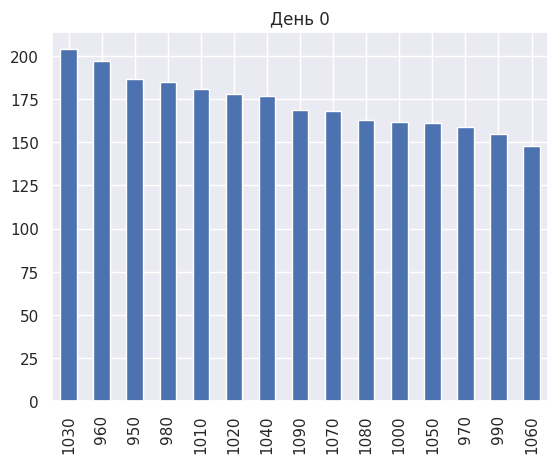

In [ ]:
df_0_series['temperature'].value_counts().plot(kind="bar",
                                               title="День 0")

<Axes: title={'center': 'День 1'}>

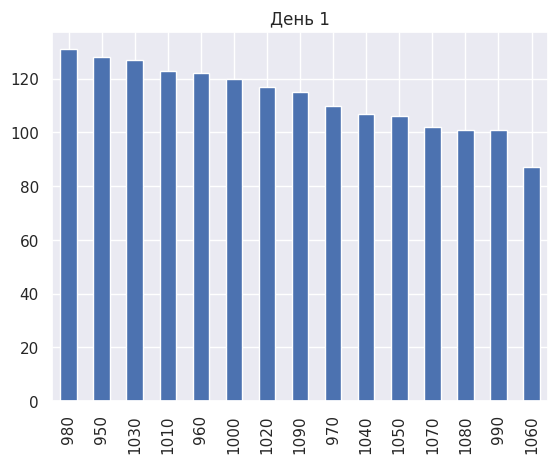

In [ ]:
df_1_series['temperature'].value_counts().plot(kind="bar",
                                               title="День 1")

<Axes: title={'center': 'День 2'}>

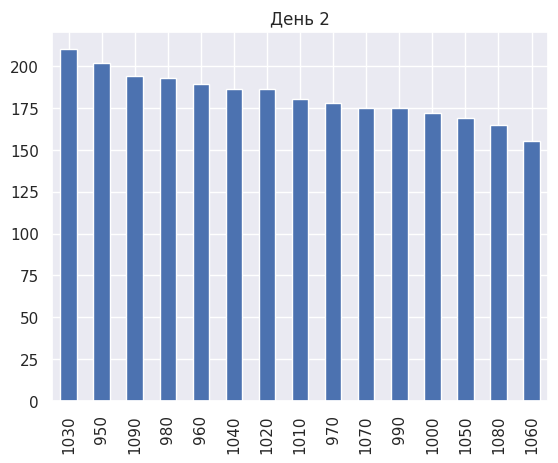

In [ ]:
df_2_series['temperature'].value_counts().plot(kind="bar",
                                               title="День 2")

**Визуализация в пределах одного дня распределения стартовой температуры обработки в печи:**

In [ ]:
df_0_ovens.head()

,start_temp,working_temps,operations
0,1220,"[960, 1030, 1190, 1100, 1230, 1070, 1110, 1080...","[prokat, kovka]"
1,990,"[980, 1190, 1030, 1100, 990]","[otzhig, kovka]"
2,1220,"[970, 1060, 1220]",[otzhig]
3,1020,"[1060, 1100, 1140, 1240, 1150, 1020]",[kovka]
4,1020,"[970, 1100, 1070, 980, 1180, 990, 1020]",[otzhig]


<Axes: title={'center': 'День 0'}>

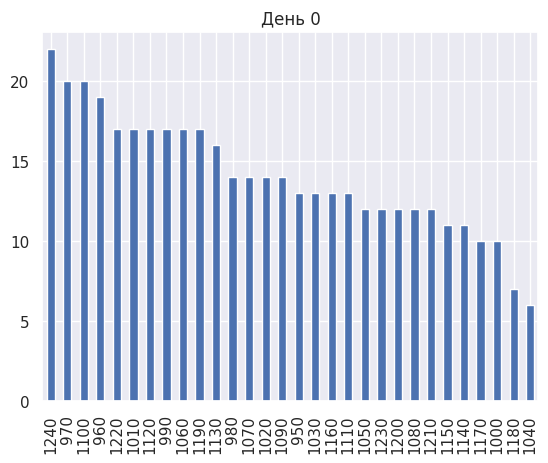

In [ ]:
df_0_ovens['start_temp'].value_counts().plot(kind="bar",
                                             title="День 0")

<Axes: title={'center': 'День 1'}>

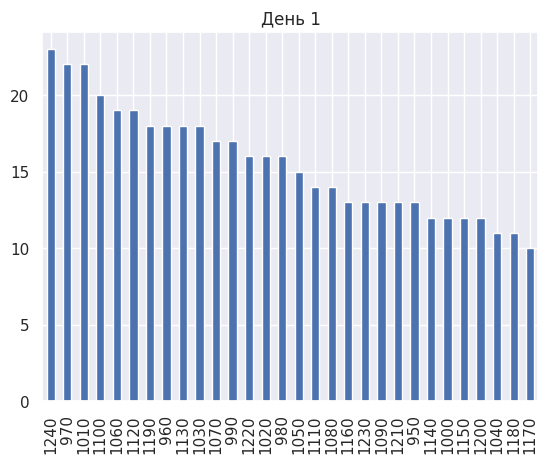

In [ ]:
df_1_ovens['start_temp'].value_counts().plot(kind="bar",
                                             title="День 1")

<Axes: title={'center': 'День 2'}>

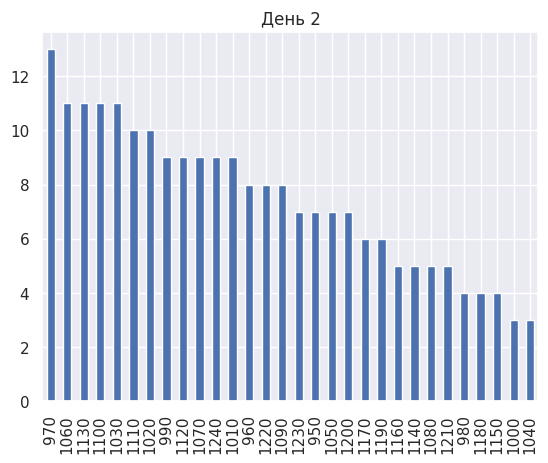

In [ ]:
df_2_ovens['start_temp'].value_counts().plot(kind="bar",
                                             title="День 2")

In [ ]:
# сохраняем датасеты в файлы для последующего обучения модели
draft_model_fact.to_csv("draft_model_fact.csv", index=True, sep=";", decimal=",", encoding="windows-1251")

In [ ]:
# сохраняем датасеты в файлы для последующего тестирования обученной модели
draft_model_fact.to_csv("draft_model_high.csv", index=True, sep=";", decimal=",", encoding="windows-1251")
draft_model_fact.to_csv("draft_model_low.csv", index=True, sep=";", decimal=",", encoding="windows-1251")

In [ ]:
# проверка сохранения файла с датасетом:
df_test = pd.read_csv("draft_model_fact.csv", sep=";", decimal=",", encoding="windows-1251")
df_test.shape

(92325, 20)

# **ЗАВЕРШЕНИЕ EDA**